In [1]:
# SETUP SLEEPY
import os
os.chdir('../../')

In [14]:
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt
sl.Defaults['verbose']=False
from copy import copy

<AxesSubplot:xlabel='t / s', ylabel='<$^{15}N_z$>'>

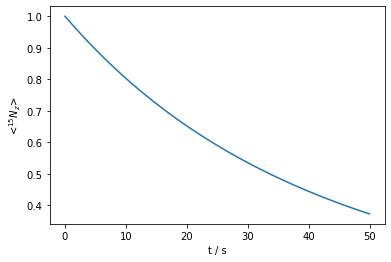

In [9]:
ex0=sl.ExpSys(600,Nucs=['1H','15N'],LF=True,pwdavg='alpha0beta45')
ex0.set_inter('dipole',i0=0,i1=1,delta=22000)
ex1=ex0.copy()
ex1.set_inter('dipole',i0=0,i1=1,delta=22000,euler_d=[0,15,0])

L=sl.Liouvillian(ex0,ex1,kex=sl.Tools.twoSite_kex(1e-10))

sl.Rho('15Nz','15Nz').DetProp(L.U(.1),n=500).plot()

In [108]:
a,b=np.linalg.eig(L[0].L(0))
bi=np.linalg.pinv(b)
i=a.real<-1e15
b[:,i]=0
bi[i]=0
Lnew=b@np.diag(a)@bi
# Lnew=0.5*(Lnew[:16][:,:16]+Lnew[16:][:,16:])

In [109]:
ex=sl.ExpSys(600,Nucs=['1H','15N'],LF=True,pwdavg='alpha0beta45')
L1=sl.Liouvillian(ex,ex).add_relax(Lnew)

<AxesSubplot:xlabel='t / s', ylabel='<$^{15}N_z$>'>

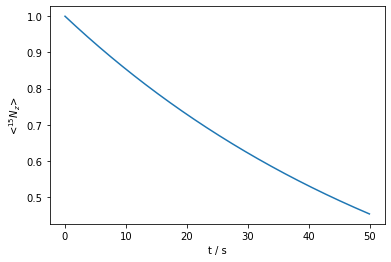

In [110]:
sl.Rho('15Nz','15Nz').DetProp(L1.U(.1),n=500).plot()

In [104]:
ex

2-spin system (1H,15N)
B0 = 14.092 T (600.000 MHz 1H frequency)
rotor angle = 54.736 degrees
rotor frequency = 10.0 kHz
Temperature = 298 K
Powder Average: alpha0beta0 with 1 angle
Gamma not included
Interactions:
